In [2]:
import requests
import json
import cv2
import csv
from dataclasses import dataclass


@dataclass
class Pokemon:
    name: str
    hp: int
    attack: int
    defense: int
    special_attack: int
    special_defense: int
    speed: int
    type: str
    weight: int
    sprite: str

@dataclass
class Item:
    name: str
    text_desc: str
    sprite: str

@dataclass
class Move:
    name: str
    move_effect: str
    accuracy: int
    type: str
    power: int
    pp: int

@dataclass
class Type:
    name: str
    weaknesses: list
    strengths: list




In [5]:

base_url = "https://pokeapi.co/api/v2/"

classes = ["pokemon?offset=0&limit=","item?offset=0&limit=","move?offset=0&limit=","type"]

temp_dict = {}
data_dict = {}
pokemon_list =[]
item_list = []
move_list =[]
type_list =[]
counter = 0
for x in classes[0:3]:

    fetchedData = requests.get(base_url + x)

    temp_dict = fetchedData.json()

    classes[counter] = classes[counter] + str(temp_dict["count"])

    counter += 1

for x in classes:

    fetchedData = requests.get(base_url + x)

    temp_dict = fetchedData.json()

    if x == classes[0]:
        
        for x in temp_dict["results"]:

            data = requests.get(x["url"])

            data_dict = data.json()

            try:
                pokemon_list.append(Pokemon(data_dict["species"]["name"],data_dict["stats"][0]["base_stat"],data_dict["stats"][1]["base_stat"],data_dict["stats"][2]["base_stat"],data_dict["stats"][3]["base_stat"],data_dict["stats"][4]["base_stat"],data_dict["stats"][5]["base_stat"]
                                            ,data_dict["types"][0]["type"]["name"],data_dict["weight"],data_dict["sprites"]["front_default"]))
            except:
                pokemon_list.append(Pokemon(None,None,None,None,None,None,None,None,None,None))

    elif x == classes[1]:
        
        for x in temp_dict["results"]:
            
            data = requests.get(x["url"])

            data_dict = data.json()

            try:
                item_list.append(Item(data_dict["names"][7]["name"],data_dict["effect_entries"][0]["short_effect"],data_dict["sprites"]["default"]))
            except:
                item_list.append(Item(None,None,None))
    elif x == classes[2]:
        
        for x in temp_dict["results"]:
            
            data = requests.get(x["url"])

            data_dict = data.json()

            try:
                move_list.append(Move(data_dict["names"][7]["name"],data_dict["effect_entries"][0]["short_effect"],data_dict["accuracy"],data_dict["type"]["name"],data_dict["power"],data_dict["pp"]))
            except:
                move_list.append(Move(None,None,None,None,None,None))

    elif x == classes[3]:  
         
        for x in temp_dict["results"][0:18]:
            data = requests.get(x["url"])

            data_dict = data.json()

            temp_list_weak = [y["name"] for y in data_dict["damage_relations"]["double_damage_from"]]
            temp_list_strength = [y["name"] for y in data_dict["damage_relations"]["double_damage_to"]]

            try:
                type_list.append(Type(data_dict["names"][7]["name"],temp_list_weak,temp_list_strength))
            except:
                type_list.append(Type(None,None,None))
                
#print("\n",pokemon_list)
#print("\n",item_list)
#print("\n",move_list)
#print("\n",type_list)



In [6]:
with open("Pokemon.csv","w",newline="",encoding="utf-8") as file:

    writer = csv.writer(file)
    writer.writerow(pokemon_list[0].__dict__)
    for x in range(0,len(pokemon_list)):
        writer.writerow(pokemon_list[x].__dict__.values())

with open("Item.csv","w",newline="",encoding="utf-8") as file:

    writer = csv.writer(file)
    writer.writerow(item_list[0].__dict__)
    for x in range(0,len(item_list)):
        writer.writerow(item_list[x].__dict__.values())

with open("Move.csv","w",newline="",encoding="utf-8") as file:

    writer = csv.writer(file)
    writer.writerow(move_list[0].__dict__)
    for x in range(0,len(move_list)):
        writer.writerow(move_list[x].__dict__.values())

with open("Type.csv","w",newline="",encoding="utf-8") as file:

    writer = csv.writer(file)
    writer.writerow(type_list[0].__dict__)
    for x in range(0,len(type_list)):
        writer.writerow(type_list[x].__dict__.values())

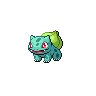

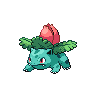

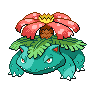

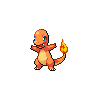

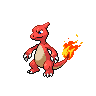

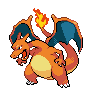

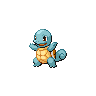

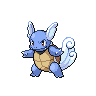

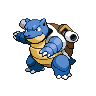

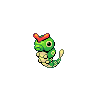

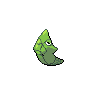

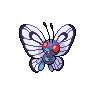

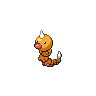

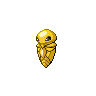

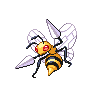

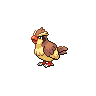

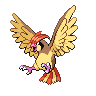

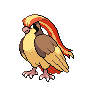

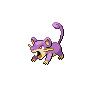

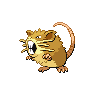

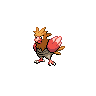

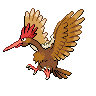

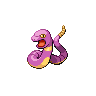

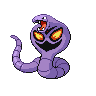

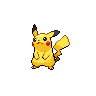

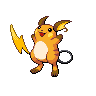

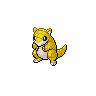

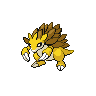

KeyboardInterrupt: 

In [27]:
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO



for pkm in pokemon_list:
    
    conn = requests.get(pkm.sprite)

    img = Image.open(BytesIO(conn.content))

    display(img)

for item in item_list:
    break
    conn = requests.get(item.sprite)

    img = Image.open(BytesIO(conn.content))

    display(img)

